<h1>2. Random Walks</h1>

In [1]:
#install.packages('Matrix', 'pracma')
library('igraph')
library('Matrix')
library('pracma')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘pracma’

The following objects are masked from ‘package:Matrix’:

    expm, lu, tril, triu



<h2>2a</h2>

Connected:  TRUE
Diameter of network:  21


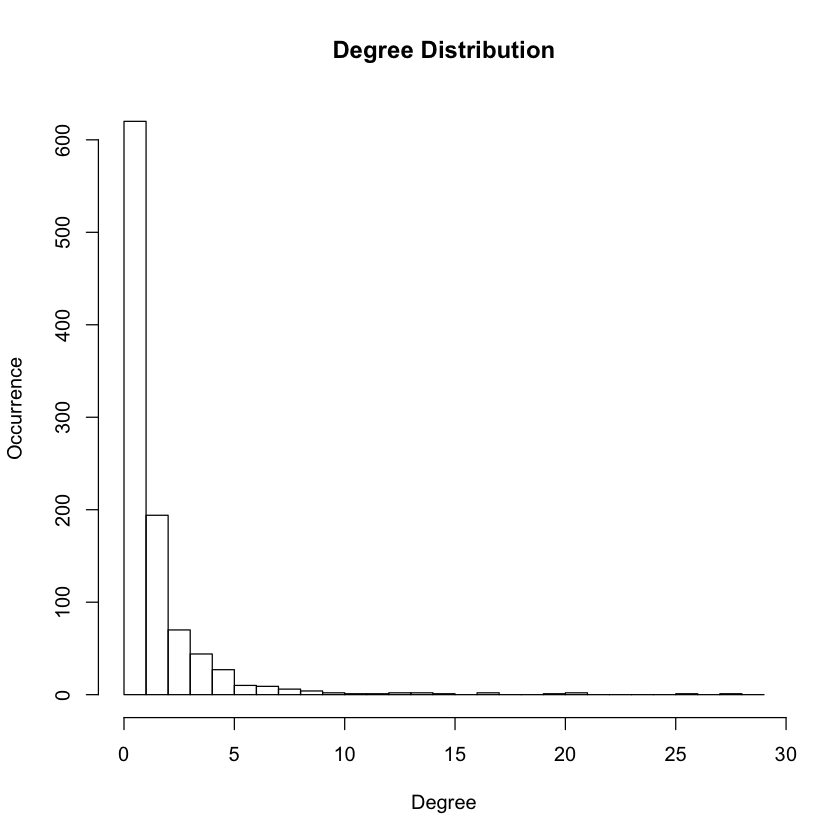

In [2]:
n = 1000
m = 1
network <- sample_pa(n=n, m=m, directed=FALSE)
writeLines(paste("Connected: ", is.connected(network)))
degree_distribution <- degree(network)
hist(degree_distribution, breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 1), xlab="Degree",ylab="Occurrence", main="Degree Distribution")
writeLines(paste("Diameter of network: ", diameter(network)))

<h2>2b</h2>

In [3]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}

In [4]:
random_walk = function (g, num_steps, start_node, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    v = start_node
    for(i in 1:num_steps){
        #fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        PMF = transition_matrix[v, ]
        v = sample(1:vcount(g), 1, prob = PMF)        
    }
    
    return(v)
}

In [6]:
random_walk_function = function(n, m, num_steps, time_steps) {
    network <- sample_pa(n=n, m=m, directed=FALSE)
    writeLines(paste("Connected: ", is.connected(network)))
    writeLines(paste("Diameter of network: ", diameter(network)))
    
    average_distance_t = numeric()
    average_standard_deviation_t = numeric()
    deg_random_walk_end = numeric()
    distance_vec = numeric()

    is.connected(network)
    if (!is.connected(network)) {
        writeLines(paste("Finding GCC as network is not connected"))
        sub_graph <-induced.subgraph(network,c(1:10))
        components <- clusters(network)
        print(components$csize)
        # which is the largest component
        ix <- which.max(components$csize)
        # get the subgraph correspondent to just the giant component
        gcc <- induced.subgraph(network, which(components$membership == ix))
        network <- gcc
        writeLines(paste("Connected: ", is.connected(network)))
        writeLines(paste("Diameter of network: ", diameter(network)))
    }

    for (t in 1:time_steps) {
        for (i in 1:num_steps) {
            start_node = sample(length(V(network)), 1)

            v_last = random_walk(network, num_steps, start_node)

            distance = shortest.paths(network, start_node, v_last)

            if (distance == Inf) {
            distance = 0
            }
            # Append the distance to the distance vector
            distance_vec = c(distance_vec, distance)
            if (t == i) {
            deg_random_walk_end = c(deg_random_walk_end, degree(network, v = v_last))
            }
        }
        average_distance_t = c(average_distance_t, mean(distance_vec))
        average_standard_deviation_t = c(average_standard_deviation_t, mean((distance_vec - mean(distance_vec))**2))
    }
    plot(average_distance_t, typ='o', col="blue", main = paste("Average Distance vs. t -", n, "nodes"), xlab = "Steps", ylab = "Average Distance")
    plot(average_standard_deviation_t, col= "red", typ='o', main = paste("Average Standard Deviation vs. t - ", n, "nodes"), xlab = "Steps", ylab = "Average Standard Deviation")

    if (n == 1000) {
        g_deg = degree(network)
        hist(x = g_deg, main = "Degree Distribution for Random Graph (n=1000)", xlab = "Number of Degrees")
        hist(x = deg_random_walk_end, main = "Degree Distribution at end of Random Walks", xlab = "Number of Degrees") 
  }
}

<h2>2b, 2c</h2>

Connected:  TRUE
Diameter of network:  19


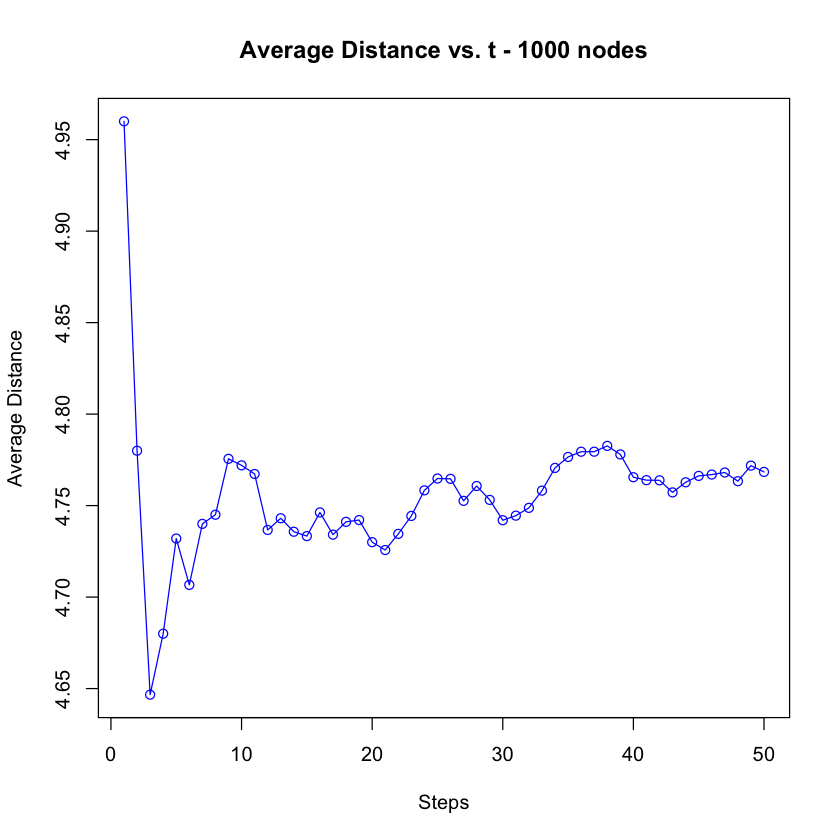

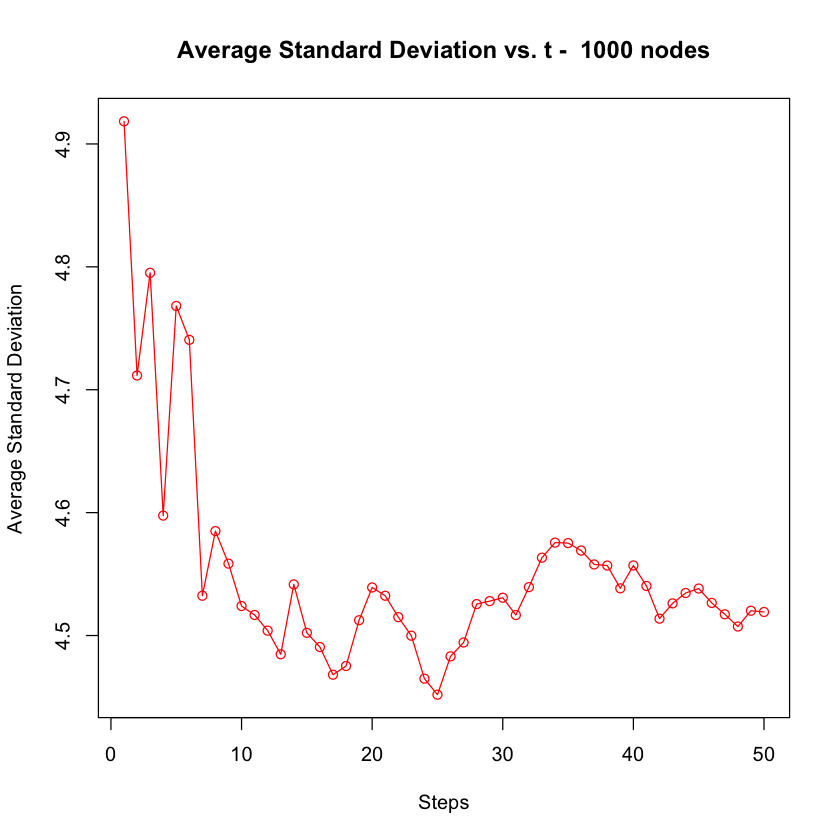

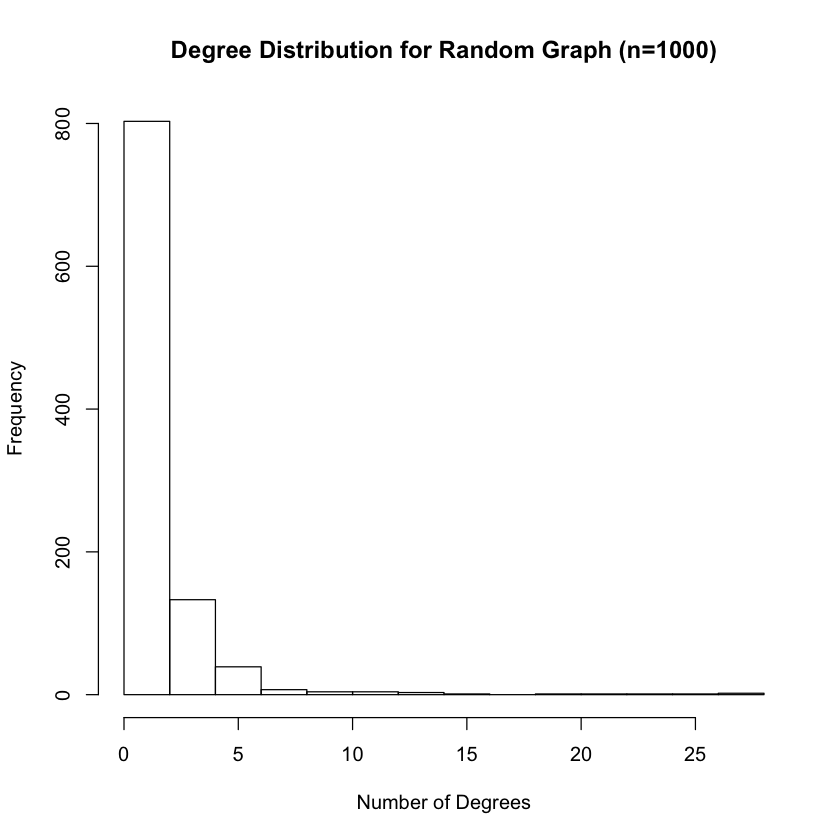

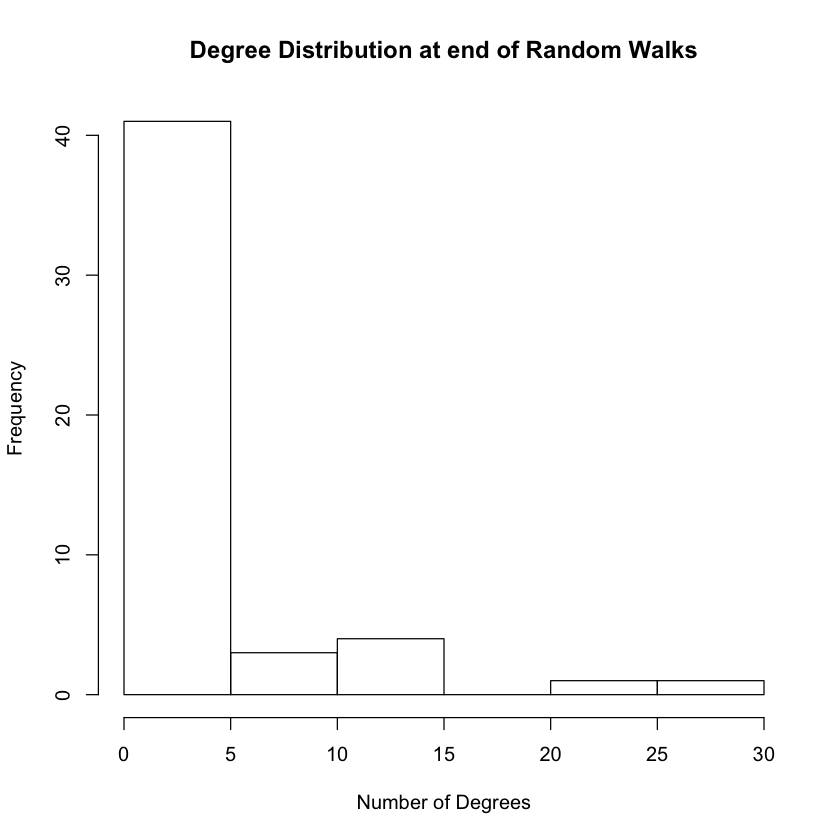

In [11]:
random_walk_function(1000, 1, 100, 50)

<h2>2d</h2>

<h3>n = 100</h3>

Connected:  TRUE
Diameter of network:  11


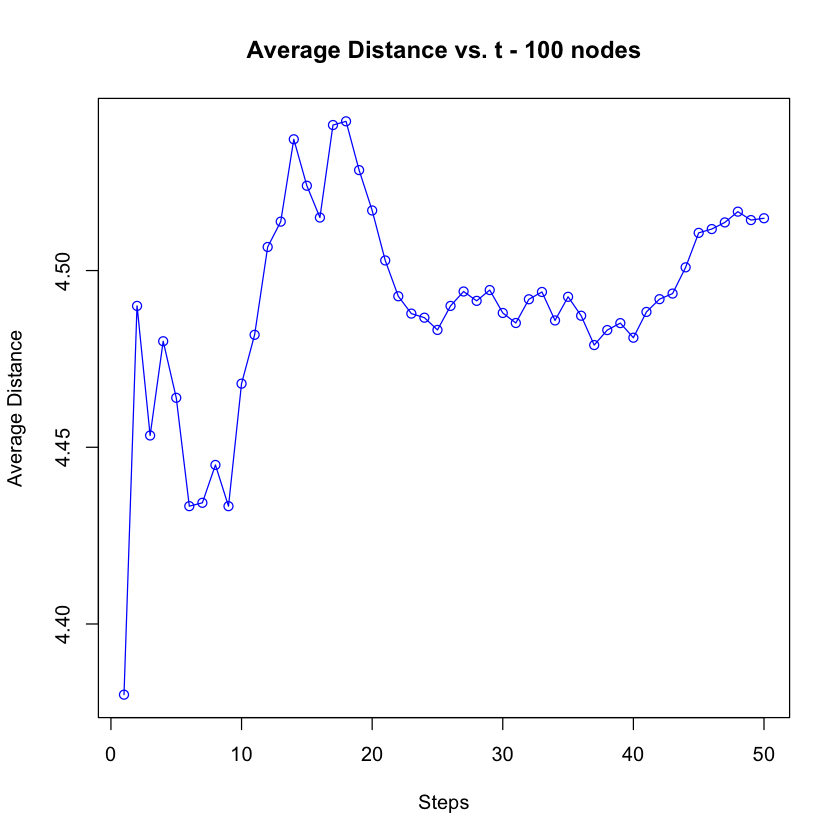

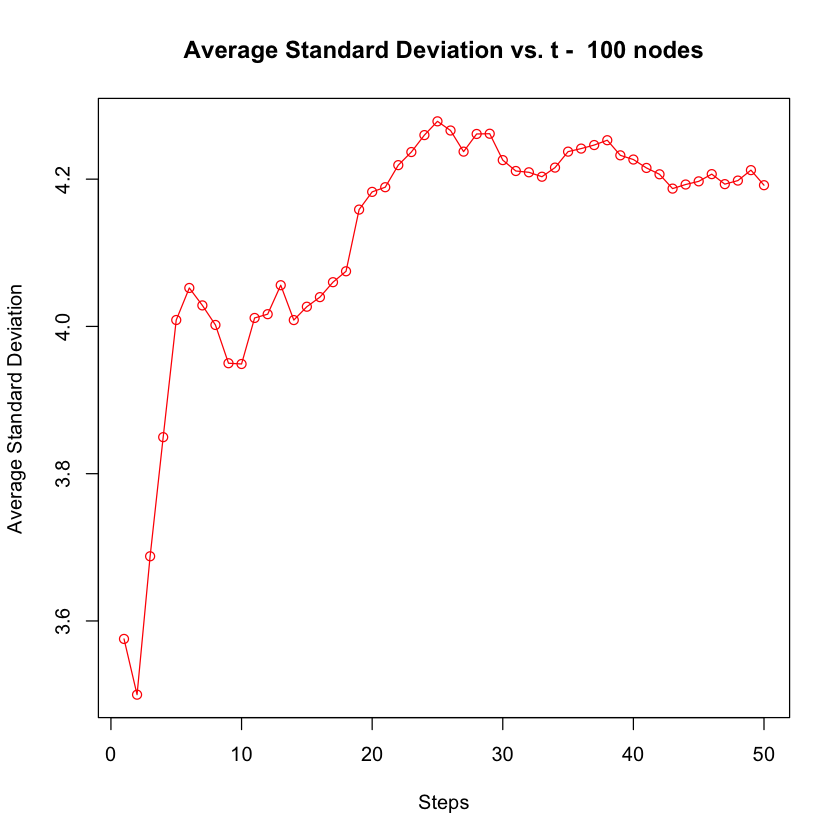

In [8]:
random_walk_function(100, 1, 100, 50)

<h3>n = 10000</h3>

In [ ]:
random_walk_function(10000, 1, 10, 50)